In [7]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from tqdm.notebook import tqdm
import os
import re
import seaborn as sns
from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
#import tensorflow as tf

In [2]:
columns = ["image_id", "caption", "comparison", "indication", "findings", "impression","height","width"]
df = pd.DataFrame(columns = columns)

In [3]:
len(os.listdir("NLMCXR_png/"))

7472

In [11]:
for file in tqdm(os.listdir("NLMCXR_reports/ecgen-radiology/")):
    if file.endswith(".xml"):
        k = "NLMCXR_reports/ecgen-radiology/"
        path = k + file
        mytree = ET.parse(path)# parsing xml report
        comparision = mytree.find(".//AbstractText[@Label='COMPARISON']").text # extracting comaparison text
        indication = mytree.find(".//AbstractText[@Label='INDICATION']").text #extracting indication text
        findings = mytree.find(".//AbstractText[@Label='FINDINGS']").text # extracting findings text
        impression = mytree.find(".//AbstractText[@Label='IMPRESSION']").text  # extracting impression text

        mytree = ET.parse(path)
        for x in mytree.findall("parentImage"):
            image_id = x.attrib['id'] + ".png"
            filename = 'NLMCXR_png/' + image_id
            image = cv2.imread(filename)

            if image is None:
                continue  # Dosya eksikse atla

            height, width, channels = image.shape
            caption_node = x.find('caption')
            caption = caption_node.text if caption_node is not None else ""

            new_row = pd.DataFrame([[image_id, caption, comparision, indication, findings, impression, height, width]], columns=columns)
            df = pd.concat([df, new_row], ignore_index=True)


100%|██████████| 3955/3955 [04:23<00:00, 15.04it/s]


In [12]:
df.shape

(7470, 8)

In [13]:
df

,image_id,caption,comparison,indication,findings,impression,height,width
0,CXR1_1_IM-0001-3001.png,Xray Chest PA and Lateral,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,624,512
1,CXR1_1_IM-0001-4001.png,Xray Chest PA and Lateral,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,420,512
2,CXR10_IM-0002-1001.png,PA and lateral chest x-XXXX XXXX.,Chest radiographs XXXX.,"XXXX-year-old male, chest pain.",The cardiomediastinal silhouette is within nor...,No acute cardiopulmonary process.,624,512
3,CXR10_IM-0002-2001.png,PA and lateral chest x-XXXX XXXX.,Chest radiographs XXXX.,"XXXX-year-old male, chest pain.",The cardiomediastinal silhouette is within nor...,No acute cardiopulmonary process.,420,512
4,CXR100_IM-0002-1001.png,"CHEST 2V FRONTAL/LATERAL XXXX, XXXX XXXX PM",None.,None,Both lungs are clear and expanded. Heart and m...,No active disease.,420,512
...,...,...,...,...,...,...,...,...
7465,CXR998_IM-2479-1001.png,"PA and lateral chest x-XXXX dated XXXX, XXXX a...",None.,XXXX-year-old XXXX with pain.,Cardiomediastinal silhouette demonstrates norm...,No acute cardiopulmonary abnormality.,420,512
7466,CXR998_IM-2479-2001.png,"PA and lateral chest x-XXXX dated XXXX, XXXX a...",None.,XXXX-year-old XXXX with pain.,Cardiomediastinal silhouette demonstrates norm...,No acute cardiopulmonary abnormality.,624,512
7467,CXR999_IM-2480-1001.png,"Chest Two views PA and lateral XXXX, XXXX XXXX...",None,Chest pain,Lungs are clear bilaterally. There is no focal...,No acute cardiopulmonary abnormality.,420,512
7468,CXR999_IM-2480-2001.png,"Chest Two views PA and lateral XXXX, XXXX XXXX...",None,Chest pain,Lungs are clear bilaterally. There is no focal...,No acute cardiopulmonary abnormality.,624,512


In [14]:
df[df['image_id']=='CXR1_1_IM-0001-3001.png']

,image_id,caption,comparison,indication,findings,impression,height,width
0,CXR1_1_IM-0001-3001.png,Xray Chest PA and Lateral,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,624,512


In [15]:
def absolute_path(x):
    '''Makes the path absolute '''
    x = 'NLMCXR_png/'+ x
    return x
    
df['Image_path'] = df['image_id'].apply(lambda x : absolute_path(x)) # making the paths absolute

In [16]:
df.head(5)

,image_id,caption,comparison,indication,findings,impression,height,width,Image_path
0,CXR1_1_IM-0001-3001.png,Xray Chest PA and Lateral,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,624,512,NLMCXR_png/CXR1_1_IM-0001-3001.png
1,CXR1_1_IM-0001-4001.png,Xray Chest PA and Lateral,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,420,512,NLMCXR_png/CXR1_1_IM-0001-4001.png
2,CXR10_IM-0002-1001.png,PA and lateral chest x-XXXX XXXX.,Chest radiographs XXXX.,"XXXX-year-old male, chest pain.",The cardiomediastinal silhouette is within nor...,No acute cardiopulmonary process.,624,512,NLMCXR_png/CXR10_IM-0002-1001.png
3,CXR10_IM-0002-2001.png,PA and lateral chest x-XXXX XXXX.,Chest radiographs XXXX.,"XXXX-year-old male, chest pain.",The cardiomediastinal silhouette is within nor...,No acute cardiopulmonary process.,420,512,NLMCXR_png/CXR10_IM-0002-2001.png
4,CXR100_IM-0002-1001.png,"CHEST 2V FRONTAL/LATERAL XXXX, XXXX XXXX PM",None.,None,Both lungs are clear and expanded. Heart and m...,No active disease.,420,512,NLMCXR_png/CXR100_IM-0002-1001.png


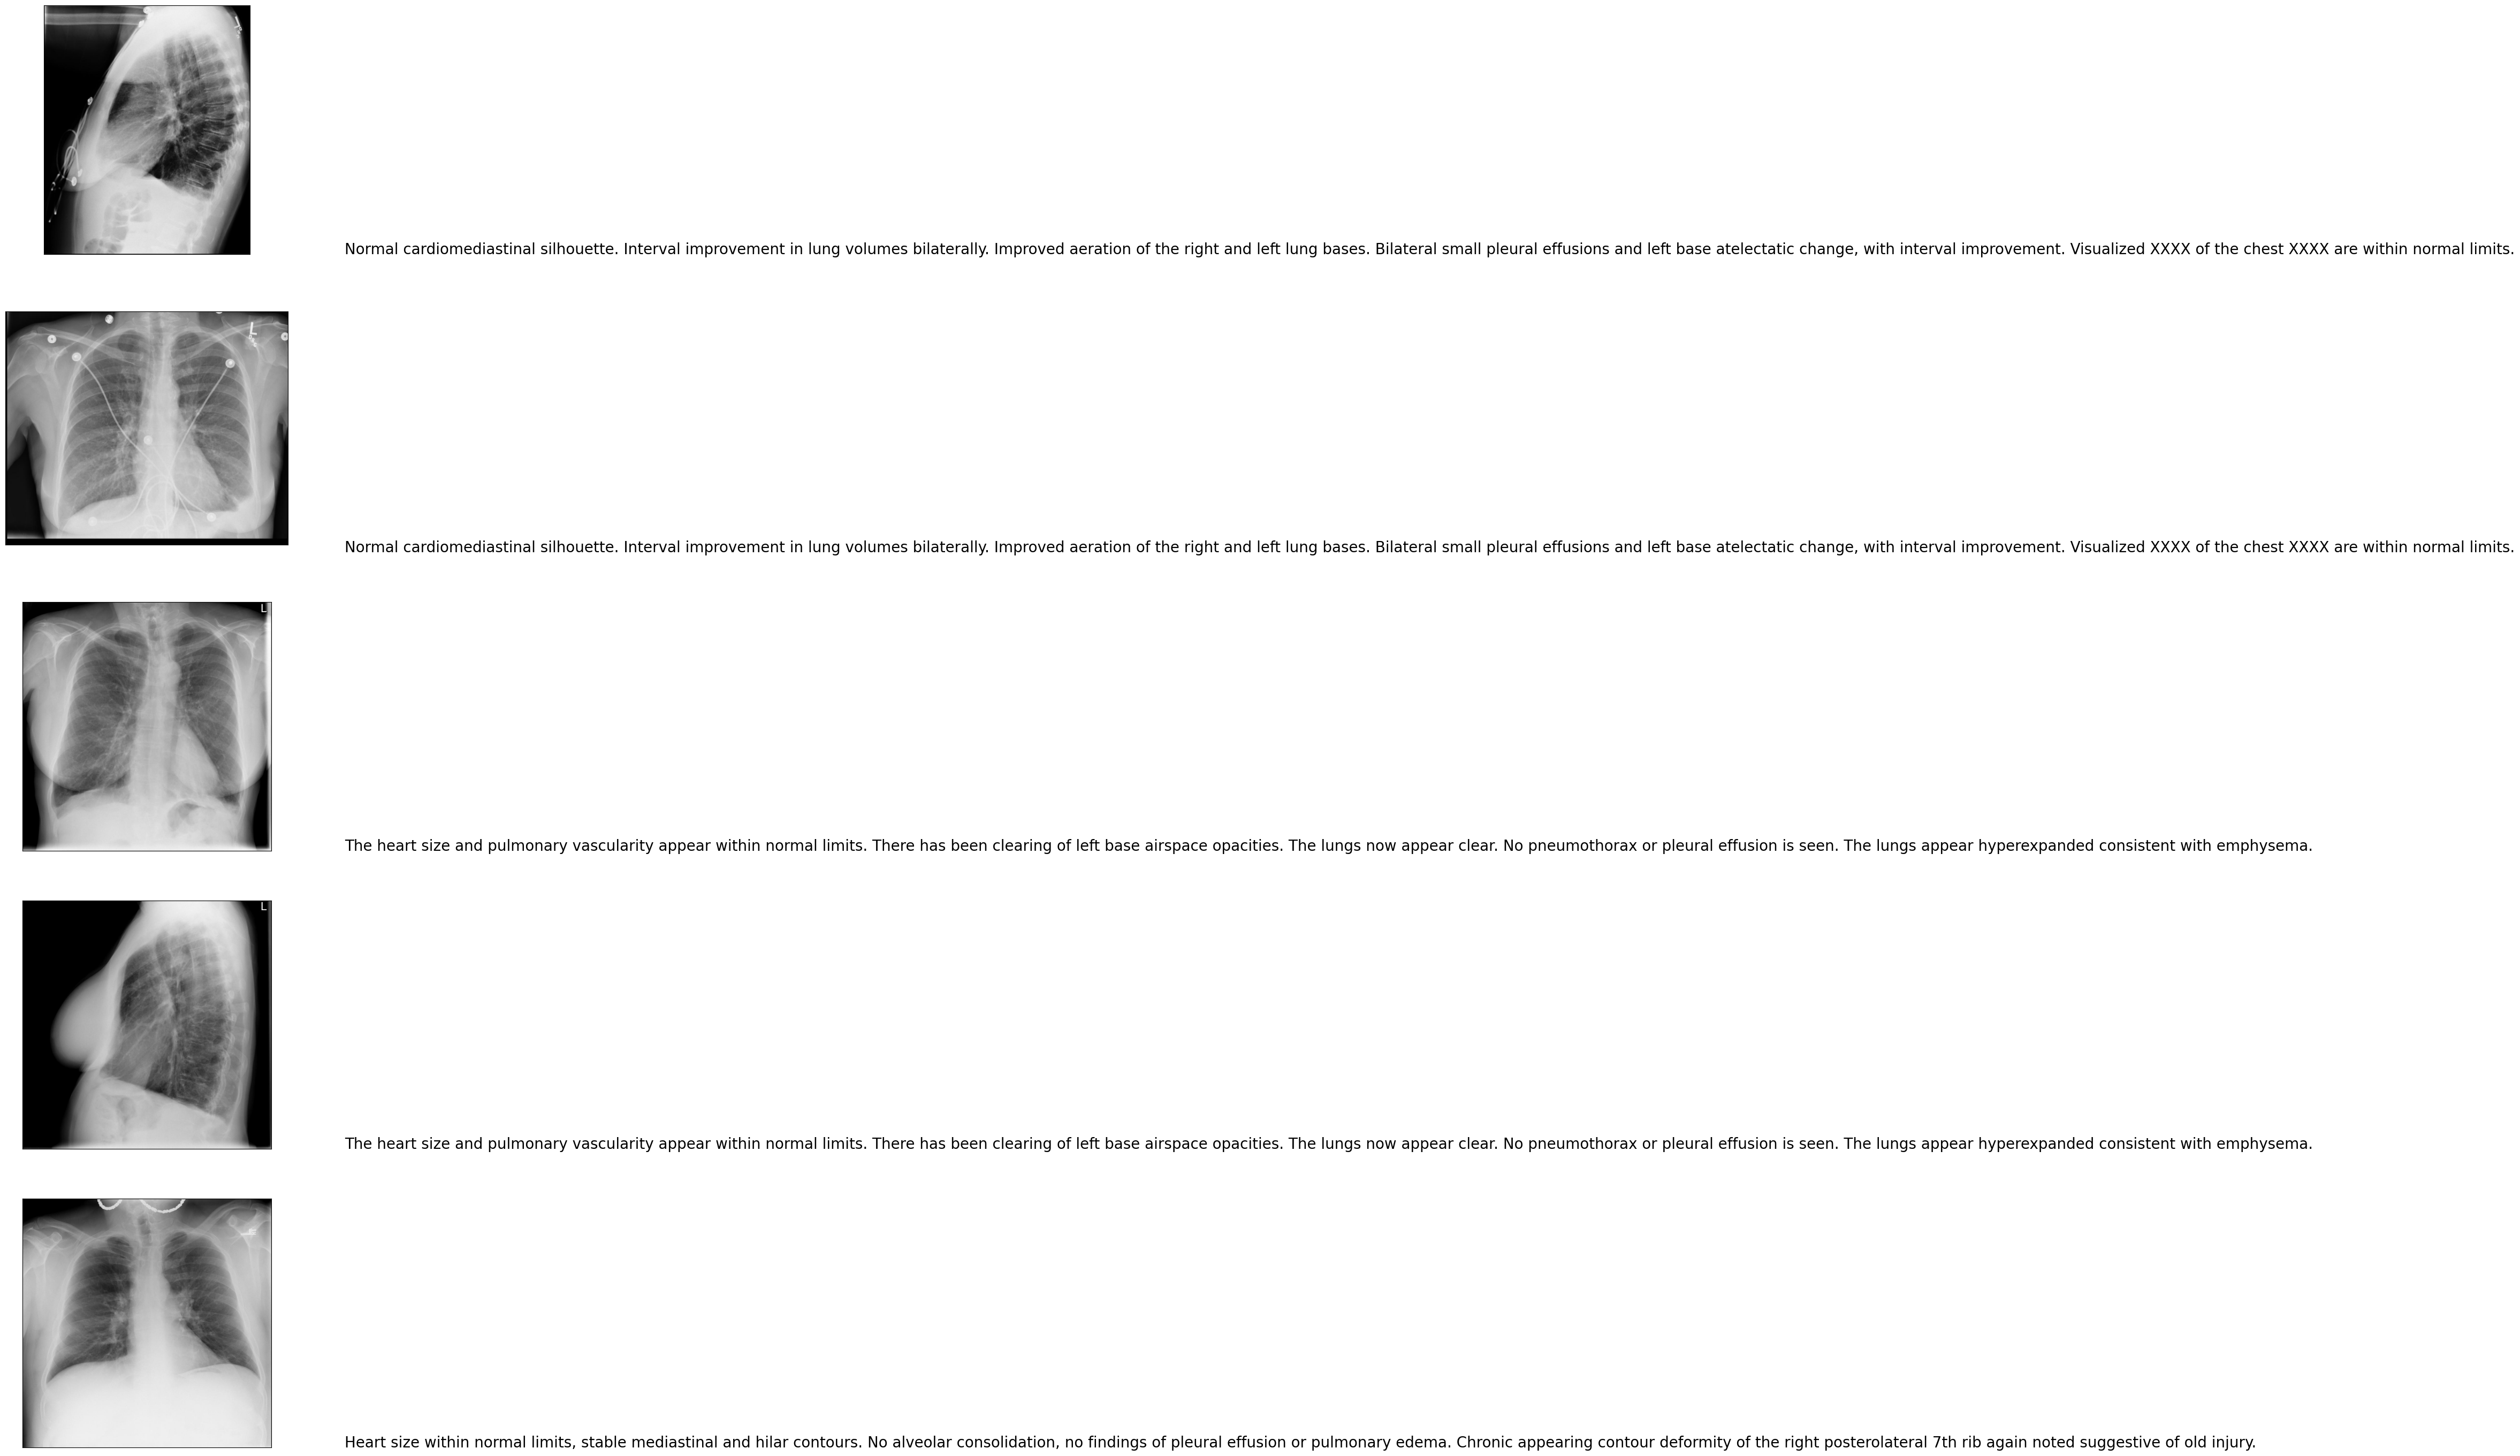

In [17]:
count = 1  
fig = plt.figure(figsize=(15,35))

for filename in df['Image_path'].values[95:100]:
    findings = list(df["findings"].loc[df["Image_path"] == filename].values)
    img = cv2.imread(filename)    
    ax = fig.add_subplot(5, 2 , count , xticks=[], yticks=[])  
    ax.imshow(img)
    count += 1
    ax = fig.add_subplot(5 ,2 ,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0, len(findings))
    for i, f in enumerate(findings):
        ax.text(0,i,f,fontsize=20)
    count += 1 
plt.show()

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Height Plot')
plt.ylabel('Heights')
plt.xlabel('--Images--')
sns.scatterplot(range(len(df.height.values)), df.height.values)
plt.subplot(122)
plt.title('Width Plot')
plt.ylabel('Widths')
plt.xlabel('--Images--')
sns.scatterplot(range(len(df.width.values)), df.width.values)

In [19]:
# number of missing values
df.isnull().sum()

image_id         0
caption          2
comparison    1157
indication     159
findings       997
impression      52
height           0
width            0
Image_path       0
dtype: int64

In [20]:
data = df[['image_id','findings','height','width','Image_path']]

In [21]:
data.shape

(7470, 5)

In [22]:
data = data.dropna(axis=0) # drop all missing value rows

In [23]:
data.shape

(6473, 5)

In [24]:
data.isnull().sum()

image_id      0
findings      0
height        0
width         0
Image_path    0
dtype: int64

'Both lungs are clear and expanded. Heart and mediastinum normal.'

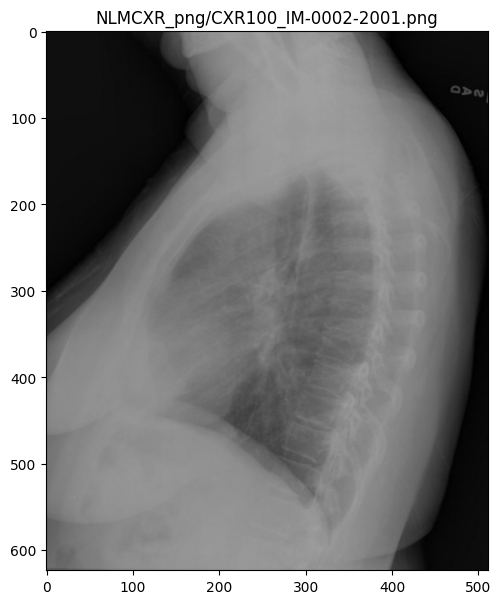

In [25]:
plt.figure(figsize=(8,7))
img = cv2.imread(data['Image_path'].values[5])
plt.imshow(img)
plt.title(data['Image_path'].values[5])

data['findings'].values[5]

In [26]:
data.Image_path

0       NLMCXR_png/CXR1_1_IM-0001-3001.png
1       NLMCXR_png/CXR1_1_IM-0001-4001.png
2        NLMCXR_png/CXR10_IM-0002-1001.png
3        NLMCXR_png/CXR10_IM-0002-2001.png
4       NLMCXR_png/CXR100_IM-0002-1001.png
                       ...                
7465    NLMCXR_png/CXR998_IM-2479-1001.png
7466    NLMCXR_png/CXR998_IM-2479-2001.png
7467    NLMCXR_png/CXR999_IM-2480-1001.png
7468    NLMCXR_png/CXR999_IM-2480-2001.png
7469    NLMCXR_png/CXR999_IM-2480-3001.png
Name: Image_path, Length: 6473, dtype: object

In [27]:
images = {}
findings = {}

for img,fin in data[['Image_path','findings']].values:
    a = img.split('.')
    file_type = a[-1]
    a = a[0].split('-')
    a.pop(len(a)-1)
    a = ('-'.join(e for e in a))
    if a not in images.keys():
        images[a] = 1
        findings[a] = fin
    else: 
        images[a] += 1
        findings[a] = fin

In [28]:
images['NLMCXR_png/CXR1001_IM-0004'],findings['NLMCXR_png/CXR1001_IM-0004']

(2,
 'Interstitial markings are diffusely prominent throughout both lungs. Heart size is normal. Pulmonary XXXX normal.')

In [29]:
print('Total Number of Unique_IDs :', len(images.keys()))

Total Number of Unique_IDs : 3350


Exception ignored in: <function tqdm.__del__ at 0x00000207810A5120>
Traceback (most recent call last):
  File "c:\Users\elifs\Desktop\TibbiProje\Indiana-University-Chest-X-Rays-Automated-Report-Generation\venv\Lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "c:\Users\elifs\Desktop\TibbiProje\Indiana-University-Chest-X-Rays-Automated-Report-Generation\venv\Lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


<Axes: title={'center': 'Number of Images  per patients'}, ylabel='count'>

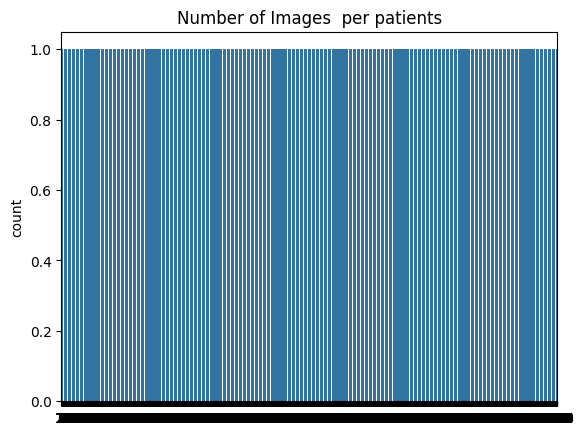

In [30]:
plt.title('Number of Images  per patients')
sns.countplot(list(images.values()))

In [31]:
def train_test_split(data):
    persons = list(data.keys())
    persons_train = persons[:2500]
    persons_cv = persons[2500:3000]
    persons_test = persons[3000:3350]
    return persons_train, persons_cv, persons_test

images_train, images_cv, images_test = train_test_split(images)

In [32]:
def combining_images(image_set):
    
    image_per_person = defaultdict(list)  # creating a list of dictionary to store all the image paths
                                            #corresponding to a person_id
    for pid in image_set:
        for img in data['Image_path'].values:
            if pid in img:
                image_per_person[pid].append(img)
            else:
                continue
    return image_per_person

In [33]:
img_per_person_train = combining_images(images_train)
img_per_person_cv = combining_images(images_cv)
img_per_person_test = combining_images(images_test)

In [34]:
img_per_person_train['NLMCXR_png/CXR1001_IM-0004']

['NLMCXR_png/CXR1001_IM-0004-1001.png', 'NLMCXR_png/CXR1001_IM-0004-1002.png']

In [35]:
def load_image(file):
    img = cv2.imread(file)
    return img

In [36]:
# just checking the ID which has 4 images
for k,v in images.items():
    if v == 4:
        print(k)
        break

NLMCXR_png/CXR1102_IM-0069


Text(0.5, 1.0, 'NLMCXR_png/CXR1102_IM-0069-4004.png')

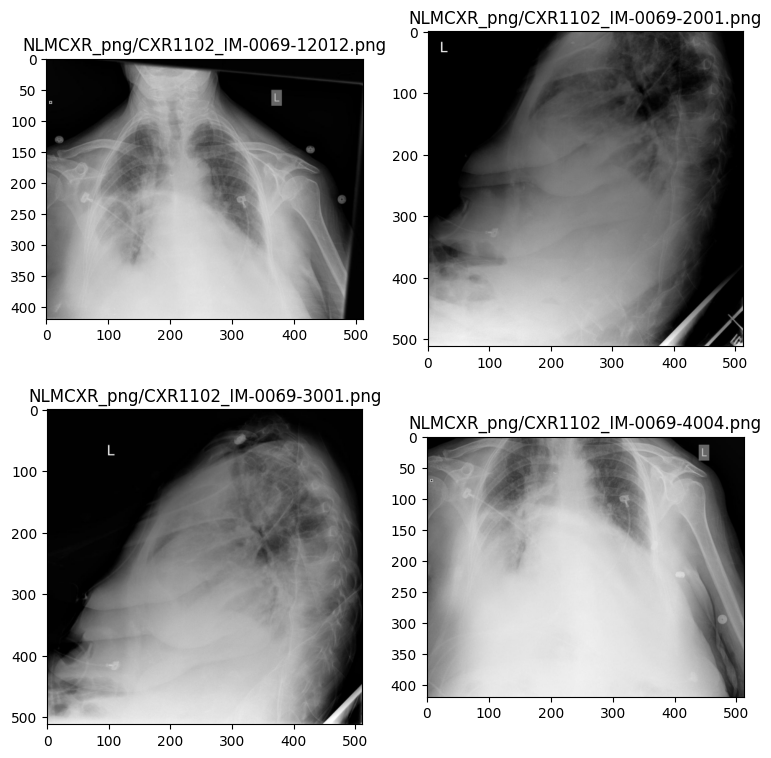

In [37]:
plt.figure(figsize=(9,9))
plt.subplot(221)
plt.imshow(load_image('NLMCXR_png/CXR1102_IM-0069-12012.png'))
plt.title('NLMCXR_png/CXR1102_IM-0069-12012.png')
plt.subplot(222)
plt.imshow(load_image('NLMCXR_png/CXR1102_IM-0069-2001.png'))
plt.title('NLMCXR_png/CXR1102_IM-0069-2001.png')
plt.subplot(223)
plt.imshow(load_image('NLMCXR_png/CXR1102_IM-0069-3001.png'))
plt.title('NLMCXR_png/CXR1102_IM-0069-3001.png')
plt.subplot(224)
plt.imshow(load_image('NLMCXR_png/CXR1102_IM-0069-4004.png'))
plt.title('NLMCXR_png/CXR1102_IM-0069-4004.png')

# Data Preperation

In [38]:
import itertools

def create_data(image_per_person):
    # new dataset
    person_id, image1, image2, report = [],[],[],[]
    for pid, imgs in image_per_person.items():   #contains pid and the images associated with that pid

        if len(imgs) == 1:
            image1.append(imgs[0])
            image2.append(imgs[0])
            person_id.append(pid)
            report.append(findings[pid])
        else:
            num = 0
            a = itertools.combinations(imgs, 2)
            for i in a:
                image1.append(i[0])
                image2.append(i[1])
                person_id.append(pid + '_' + str(num))
                report.append(findings[pid])
                num += 1
    data = pd.DataFrame()
    data['Person_id'] = person_id
    data['Image1'] = image1
    data['Image2'] = image2
    data['Report'] = report
    
    return data

In [39]:
train = create_data(img_per_person_train)
test = create_data(img_per_person_test)
cv = create_data(img_per_person_cv)

In [40]:
train.to_csv('train.csv')
test.to_csv('test.csv')
cv.to_csv('cv.csv')

In [41]:
def lowercase(text):
    '''Converts to lowercase'''
    new_text = []
    for line in text:
        new_text.append(line.lower())
    return new_text

def decontractions(text):
    '''Performs decontractions in the doc'''
    new_text = []
    for phrase in text:
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"couldn\'t", "could not", phrase)
        phrase = re.sub(r"shouldn\'t", "should not", phrase)
        phrase = re.sub(r"wouldn\'t", "would not", phrase)
        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r"\*+", "abuse", phrase)
        new_text.append(phrase)

    return new_text

def rem_punctuations(text):
    '''Removes punctuations'''
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations: 
                line = line.replace(char, "")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def rem_numbers(text):
    '''Removes numbers and irrelevant text like xxxx*'''
    new_text = []
    for line in text:
        temp = re.sub(r'x*','',line)
        new_text.append(re.sub(r'\d','',temp))
    return new_text

def words_filter(text):
    '''Removes words less than 2 characters except no and ct'''
    new_text = []
    for line in text:
        temp = line.split()
        temp2 = []
        for word in temp:
            if  len(word) <=2 and word != 'no' and word != 'ct':
                continue
            else:
                temp2.append(word)
        new_text.append(' '.join(e for e in temp2))
    return new_text

def multiple_fullstops(text):
    ''' Removes multiple full stops from the text'''
    new_text = []
    for line in text:
        new_text.append(re.sub(r'\.\.+', '.', line))
    return new_text

def fullstops(text):
    new_text = []
    for line in text:
        new_text.append(re.sub('\.', ' .', line))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def separting_startg_words(text):
    new_text = []
    for line in text:
        temp = []
        words = line.split()
        for i in words:
            if i.startswith('.') == False:
                temp.append(i)
            else:
                w = i.replace('.','. ')
                temp.append(w)
        new_text.append(' '.join(e for e in temp))
    return new_text

def rem_apostrophes(text):
    new_text = []
    for line in text:
        new_text.append(re.sub("'",'',line))
    return new_text

In [42]:
def text_preprocessing(text):
    '''Combines all the preprocess functions'''
    new_text = lowercase(text)
    new_text = decontractions(new_text)
    new_text = rem_punctuations(new_text)
    new_text = rem_numbers(new_text)
    new_text = words_filter(new_text)
    new_text = multiple_fullstops(new_text)
    new_text = fullstops(new_text)
    new_text = multiple_spaces(new_text)
    new_text = separting_startg_words(new_text)
    new_text = rem_apostrophes(new_text)
    return new_text

In [43]:
train['Report'] = text_preprocessing(train['Report'])
test['Report'] = text_preprocessing(test['Report'])
cv['Report'] = text_preprocessing(cv['Report'])

In [44]:
train

,Person_id,Image1,Image2,Report
0,NLMCXR_png/CXR1_1_IM-0001_0,NLMCXR_png/CXR1_1_IM-0001-3001.png,NLMCXR_png/CXR1_1_IM-0001-4001.png,the cardiac silhouette and mediastinum size ar...
1,NLMCXR_png/CXR10_IM-0002_0,NLMCXR_png/CXR10_IM-0002-1001.png,NLMCXR_png/CXR10_IM-0002-2001.png,the cardiomediastinal silhouette within normal...
2,NLMCXR_png/CXR100_IM-0002_0,NLMCXR_png/CXR100_IM-0002-1001.png,NLMCXR_png/CXR100_IM-0002-2001.png,both lungs are clear and epanded . heart and ...
3,NLMCXR_png/CXR1000_IM-0003_0,NLMCXR_png/CXR1000_IM-0003-1001.png,NLMCXR_png/CXR1000_IM-0003-2001.png,there increased opacity within the right upper...
4,NLMCXR_png/CXR1000_IM-0003_1,NLMCXR_png/CXR1000_IM-0003-1001.png,NLMCXR_png/CXR1000_IM-0003-3001.png,there increased opacity within the right upper...
...,...,...,...,...
2753,NLMCXR_png/CXR3682_IM-1834_0,NLMCXR_png/CXR3682_IM-1834-1001.png,NLMCXR_png/CXR3682_IM-1834-2001.png,the lungs are hypoventilated . there no focal...
2754,NLMCXR_png/CXR3683_IM-1835_0,NLMCXR_png/CXR3683_IM-1835-3001.png,NLMCXR_png/CXR3683_IM-1835-4001.png,eamination was performed with nipple markers ....
2755,NLMCXR_png/CXR3685_IM-1836_0,NLMCXR_png/CXR3685_IM-1836-1001.png,NLMCXR_png/CXR3685_IM-1836-1002.png,calcified thoracic aorta . mild rightward dev...
2756,NLMCXR_png/CXR3687_IM-1838_0,NLMCXR_png/CXR3687_IM-1838-1001.png,NLMCXR_png/CXR3687_IM-1838-2001.png,heart size and mediastinal contours are within...


In [45]:
train.to_csv('processed_train.csv')
test.to_csv('processed_test.csv')
cv.to_csv('processed_cv.csv')

In [46]:
l = [len(e.split()) for e in train['Report'].values]  # Number of words in each report

In [ ]:
print('maximum word in a report is :',max(l))

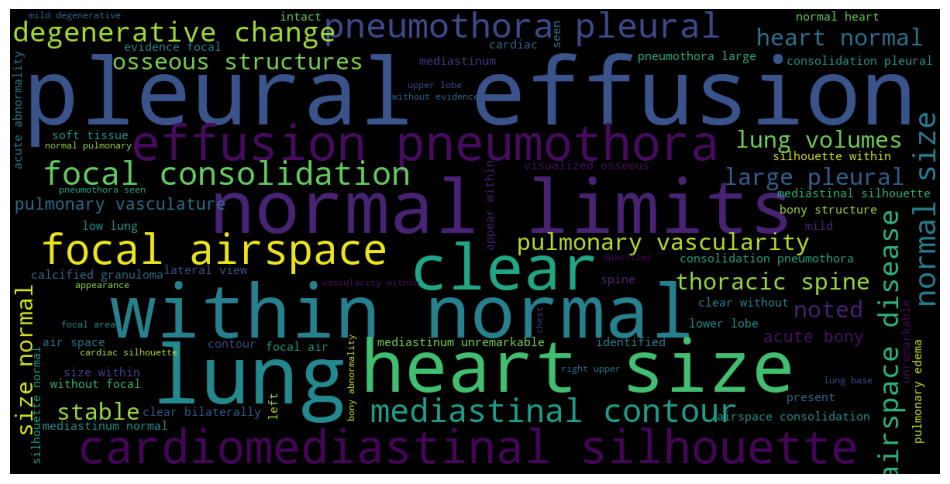

In [49]:
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',max_words=800,max_font_size=60,scale=3,random_state=1 ).generate(' '.join(data.astype(str)))

    fig = plt.figure(1, figsize=(12, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train['Report'])

<Axes: title={'center': 'Words for each findings review'}, xlabel='Report'>

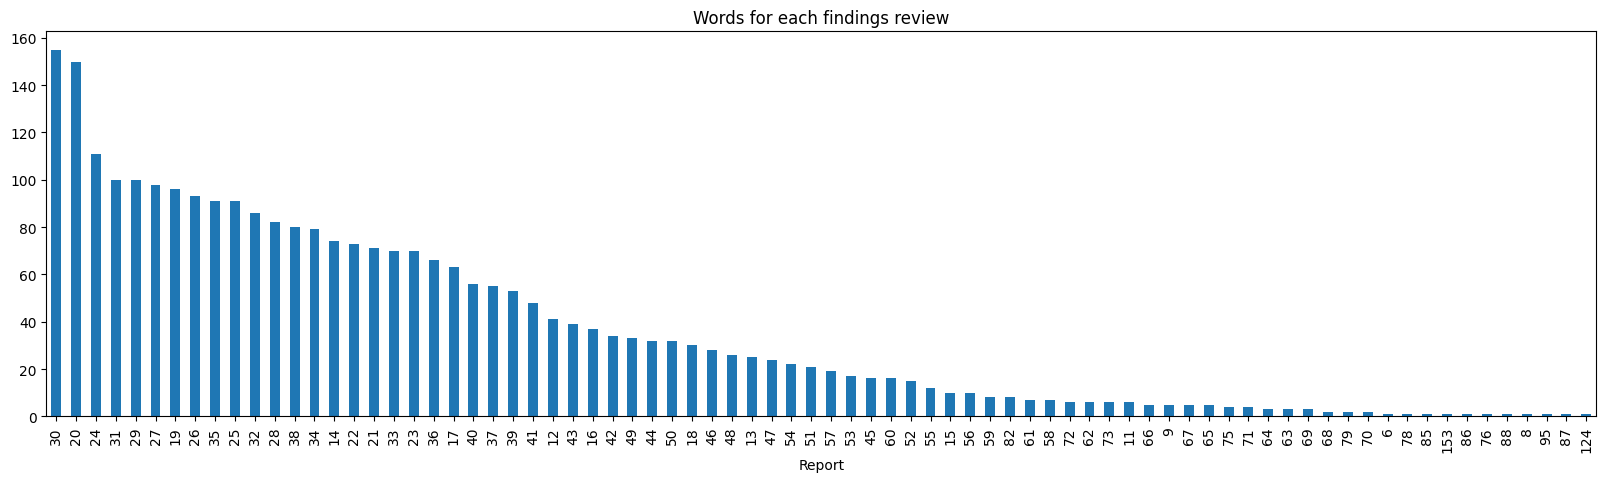

In [50]:
countword = train['Report'].str.split().apply(len).value_counts()
countword[:].plot(kind='bar',figsize=(20,5) , title = 'Words for each findings review')

In [51]:
def remodelling(x):
    '''adds start and end tokens to a sentence '''
    return 'startseq' + ' ' + x + ' ' + 'endseq'

In [52]:
train['Report'] = train['Report'].apply(lambda x : remodelling(x))
test['Report'] = test['Report'].apply(lambda x : remodelling(x))
cv['Report'] = cv['Report'].apply(lambda x : remodelling(x))

In [53]:
# save the cleaned data(STRUCTURED DATA)
train.to_csv('Final_Train_Data.csv', index=False)
test.to_csv('Final_Test_Data.csv', index=False)
cv.to_csv('Final_CV_Data.csv', index=False)